# Regularization of linear regression with norms and constraints

## Steps

1. Repeat gradient descent with two (and more) variables
2. Regularization with the $L^2$ Norm
3. Parameter Tying with the $L^2$ Norm
4. Regularization with the $L^1$ Norm
5. Regularization with the $L^2$ Norm constraint
6. Regularization with the $L^1$ Norm constraint
7. Regularization of underconstraint problems

## Repeat gradient descent with two (and more) variables

Check the Notebook: "Numerical Linear Regression".

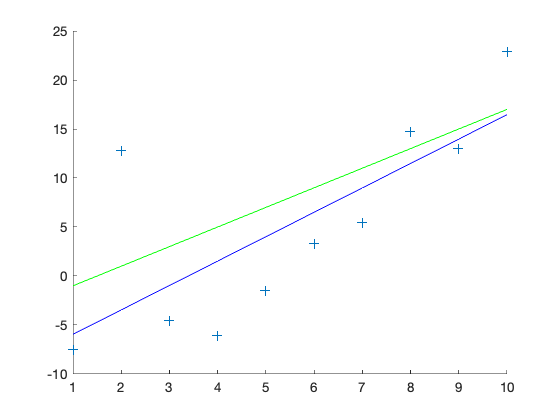

In [635]:
rng(1);
N=10;
a0 = 2;
b0 = -3;
X = 1:N;
Y = a0*X + b0 + normrnd(0,10,1,N);
scatter(X,Y,'+')
hold on
plot(X,a0*X + b0,'color','g')
mdl1 = fitlm(X,Y);
plot(X,mdl1.Coefficients.Estimate(2)*X + mdl1.Coefficients.Estimate(1),'color','b')

We learn $\hat a$ and $\hat b$ from the data and expect them to be $\approx 2$ and $\approx -3$, respectively. 
Therefore, we minimize the residual sum of squares; $(\hat a, \hat b) = \arg \min_{a,b} RSS(a,b)=\sum_{i=1}^{n}(y_i- a x_i - b)^2$.  

Let's 3D plot the $RSS$ as a function of $a$ and $b$. We chose the ranges of $a$ and $b$ around the (actually unknown) minima of $\approx 2$ and $\approx -3$, respectively. 

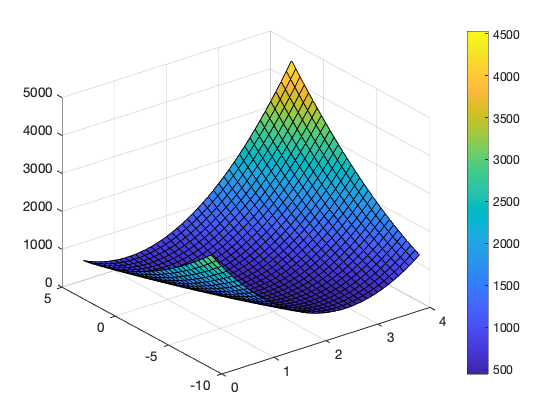

In [636]:
f = @(a, b)(rss2(a,b,X,Y));
[A,B] = meshgrid(a0-2:0.1:a0+2,b0-6:0.4:b0+6);
plot3d(f, A, B, true) %3D surface

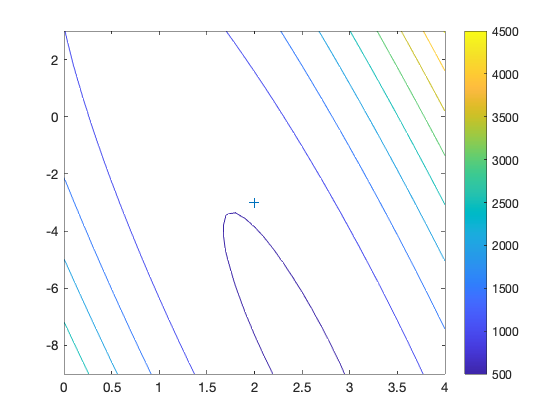

In [637]:
plot3d(f, A, B, false) %3D contour
hold on
plot(a0,b0,'+')

The gradient of $RSS(a,b)$ for any $a, b$ is defiend as:

$$
\begin{aligned}
\nabla RSS(a,b) &= \left [ \frac{\partial RSS(a,b)}{\partial a}, \frac{\partial RSS(a,b)}{\partial b}\right ]^T\\
&= -2 \left [ \sum_{i=1}^{n}(y_i- a x_i-b)x_i, \sum_{i=1}^{n}(y_i- a x_i-b) \right ]^T 
\end{aligned}
$$

The gradient descent find the minimum.

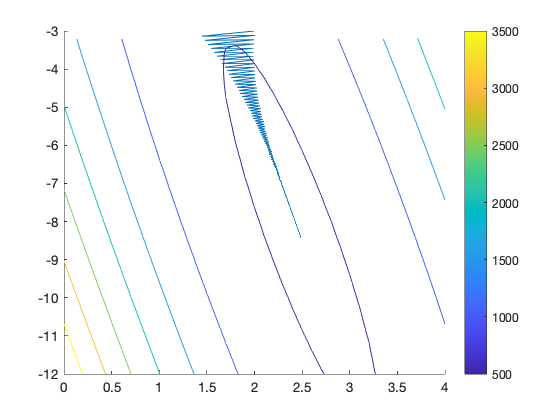

In [638]:
ff = @(a,b)(grad_rss2(a,b,X,Y));
K = 1000;
learning_eps = 0.001;
learning_eps = 0.0001;
learning_eps = 0.0025;
[as, bs] = grad_desc_rss2(K, a0, b0, learning_eps, f, ff, true);
[as, bs].';

Here the final result.

Orig: a=2.49 b=-8.44 loss=444.10


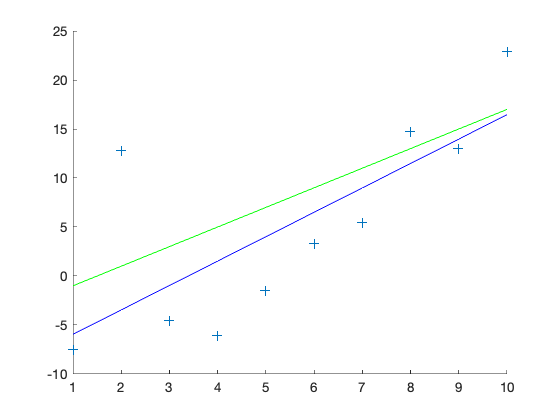

In [639]:
a_orig = as(K+1);
b_orig = bs(K+1);
fprintf("Orig: a=%.2f b=%.2f loss=%.2f",a_orig,b_orig,rss2(as(K+1),bs(K+1),X,Y));
scatter(X,Y,'+')
hold on
plot(X,a0*X+b0,'color','g')
plot(X,as(K+1)*X+bs(K+1),'color','b')
hold off

## Regularization with the $L^2$ Norm

We add a penalty term to the loss function proportional to the square of the $L^2$ Norm of the parameters: $a^2 + b^2$. 

The regulated loss function is 
$$(\hat a, \hat b) = \arg \min_{a,b} RSS_{L^2}(a,b)=\sum_{i=1}^{n}(y_i- a x_i - b)^2 + \alpha(a^2 + b^2)$$  
for some parameter $\alpha$.

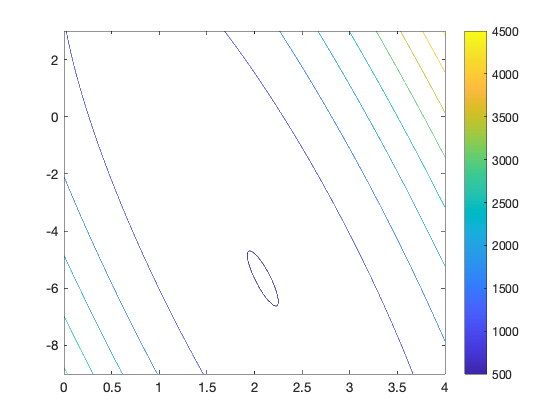

In [640]:
%alpha =0.1;
alpha =1;
%alpha =10;
fL2 = @(a,b)(f(a,b)+alpha*(a^2 + b^2));
[A,B] = meshgrid(a0-2:0.01:a0+2,b0-6:0.01:b0+6);
plot3d(fL2, A, B, false) %contour

The the new gradient of is:

$$
\begin{aligned}
\nabla RSS_{L^2}(a,b) 
&= \left [ \frac{\partial RSS_{L^2}(a,b)}{\partial a}, \frac{\partial RSS_{L^2}(a,b)}{\partial b}\right ]^T\\
&= \left [ \frac{\partial RSS(a,b)}{\partial a} +2\alpha a, \frac{\partial RSS(a,b)}{\partial b}+2\alpha b\right ]^T\\
&= \left [-2 \sum_{i=1}^{n}(y_i- a x_i-b)x_i +2 \alpha a, -2 \sum_{i=1}^{n}(y_i- a x_i-b) +2 \alpha b\right ]^T 
\end{aligned}
$$

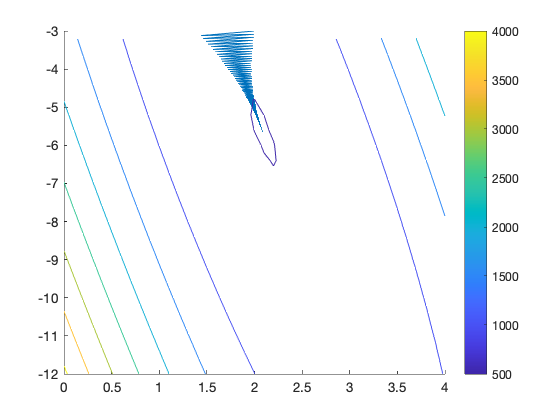

In [641]:
ffL2 = @(a,b)(ff(a,b)+[2*alpha*a;2*alpha*b]);
K = 1000;
%learning_eps = 0.001;
%learning_eps = 0.0001;
learning_eps = 0.0025;
[as, bs] = grad_desc_rss2(K, a0, b0, learning_eps, fL2, ffL2, true);
[as, bs].';

L2: a=2.09 b=-5.66 loss=460.67


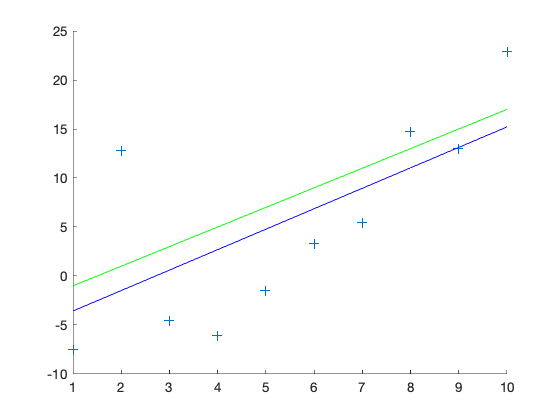

In [642]:
fprintf("L2: a=%.2f b=%.2f loss=%.2f",as(K+1),bs(K+1),rss2(as(K+1),bs(K+1),X,Y));
scatter(X,Y,'+')
hold on
plot(X,a0*X+b0,'color','g')
plot(X,as(K+1)*X+bs(K+1),'color','b')
hold off

As expected, we observe that the length of the parameter vector gets smaller while the loss became larger.

## Parameter Tying 

For demonstrating the approach, let's tie the parameters to the (usually unknown) gorund truth: $a_0 = 2,
b_0 = -3$. We add a penalty term to the loss function proportional to the square of the $L^2$ Norm of the parameters difference vector: $(a-a_0)^2 + (b-b_0)^2$. 

The regulated loss function is 
$$(\hat a, \hat b) = \arg \min_{a,b} RSS_{L^2, a_0, b_0}(a,b)=\sum_{i=1}^{n}(y_i- a x_i - b)^2 + \alpha((a-a_0)^2 + (b-b_0)^2)$$  
for some parameter $\alpha$.

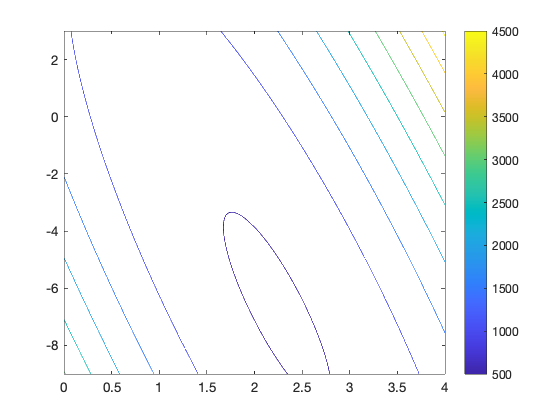

In [643]:
alpha =1;
fL2 = @(a,b)(f(a,b)+alpha*((a-a0)^2 + (b-b0)^2));
[A,B] = meshgrid(a0-2:0.01:a0+2,b0-6:0.01:b0+6);
plot3d(fL2, A, B, false) %contour

The the new gradient of is:

$$
\begin{aligned}
\nabla RSS_{L^2, a_0, b_0}(a,b) 
&= \left [ \frac{\partial RSS_{L^2, a_0, b_0}(a,b)}{\partial a}, \frac{\partial RSS_{L^2, a_0, b_0}(a,b)}{\partial b}\right ]^T\\
&= \left [ \frac{\partial RSS(a,b)}{\partial a} +2\alpha (a-a_0), \frac{\partial RSS(a,b)}{\partial b}+2\alpha (b - b_0)\right ]^T\\
&= \left [-2 \sum_{i=1}^{n}(y_i- a x_i-b)x_i +2 \alpha (a-a_0), -2 \sum_{i=1}^{n}(y_i- a x_i-b) +2 \alpha (b - b_0)\right ]^T 
\end{aligned}
$$

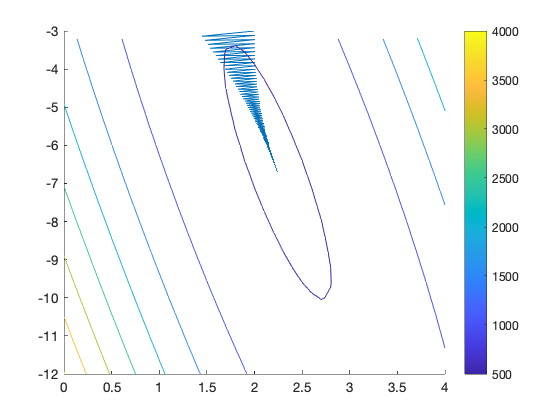

In [644]:
ffL2 = @(a,b)(ff(a,b)+[2*alpha*(a-a0);2*alpha*(b-b0)]);
K = 1000;
%learning_eps = 0.001;
%learning_eps = 0.0001;
learning_eps = 0.0025;
[as, bs] = grad_desc_rss2(K, a0, b0, learning_eps, fL2, ffL2, true);
[as, bs].';

L2: a=2.24 b=-6.70 loss=450.60


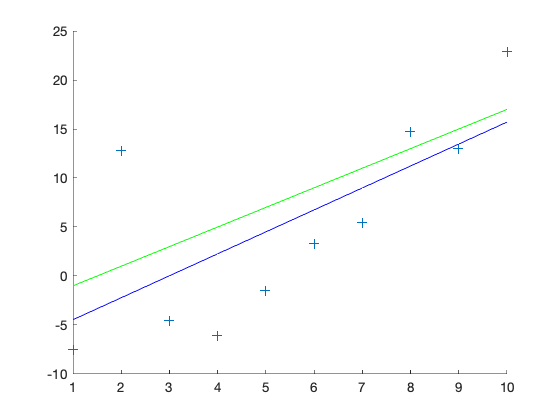

In [645]:
fprintf("L2: a=%.2f b=%.2f loss=%.2f",as(K+1),bs(K+1),rss2(as(K+1),bs(K+1),X,Y));
scatter(X,Y,'+')
hold on
plot(X,a0*X+b0,'color','g')
plot(X,as(K+1)*X+bs(K+1),'color','b')
hold off

As expected, we observe that the parameters vector get closer to the ground truth $a=2.24\ (2.49), b=-6.70\ (-8.44)$ while the loss became larger: $RSS=450.6\ (444.1)$.

## Regularization with the $L^1$ Norm

We add a penalty term to the loss function proportional to the $L^2$ Norm, i.e., sum of the absolute values of the parameters: $|a| + |b|$. 

The regulated loss function is now:
$$(\hat a, \hat b) = \arg \min_{a,b} RSS_{L^1}(a,b)=\sum_{i=1}^{n}(y_i- a x_i - b)^2 + \alpha(|a| + |b|)$$  
for some parameter $\alpha$.

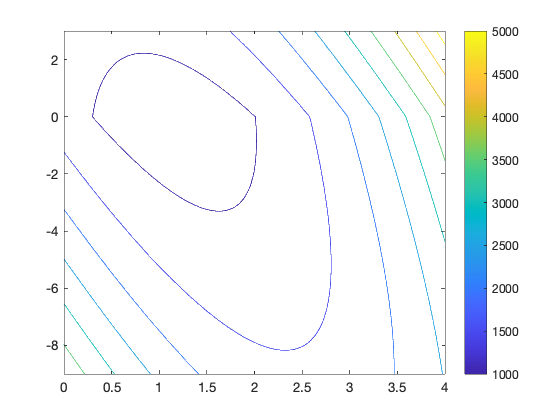

In [646]:
alpha = 100;
fL1 = @(a,b)(f(a,b)+alpha*(abs(a) + abs(b)));
[A,B] = meshgrid(a0-2:0.01:a0+2,b0-6:0.04:b0+6);
plot3d(fL1, A, B, false) %contour

The the new gradient of is:

$$
\begin{aligned}
\nabla RSS_{L^1}(a,b) 
&= \left [ \frac{\partial RSS_{L^1}(a,b)}{\partial a}, \frac{\partial RSS_{L^1}(a,b)}{\partial b}\right ]^T\\
&= \left [ \frac{\partial RSS(a,b)}{\partial a} +\alpha\ \text{sign}(a), \frac{\partial RSS(a,b)}{\partial b}+\alpha\ \text{sign}(b)\right ]^T\\
&= \left [-2 \sum_{i=1}^{n}(y_i- a x_i-b)x_i +\alpha\ \text{sign}(a), -2 \sum_{i=1}^{n}(y_i- a x_i-b) +\alpha\   \text{sign}(b)\right ]^T 
\end{aligned}
$$

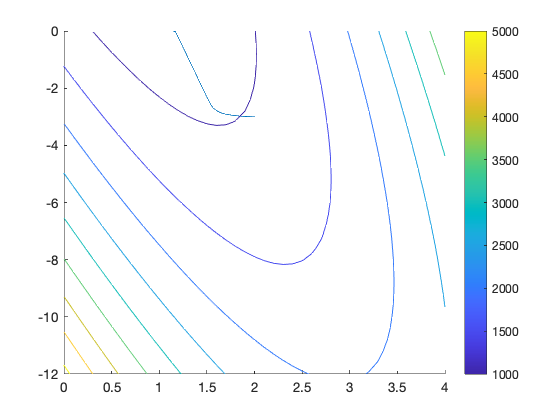

In [647]:
ffL1 = @(a,b)(ff(a,b)+[alpha*sign(a);alpha*sign(b)]);
K = 5000;
%learning_eps = 0.001;
learning_eps = 0.0001;
%learning_eps = 0.0025;
[as, bs] = grad_desc_rss2(K, a0, b0, learning_eps, fL1, ffL1, true);
[as, bs].';

L1 a=1.15 b=-0.00 loss=603.13


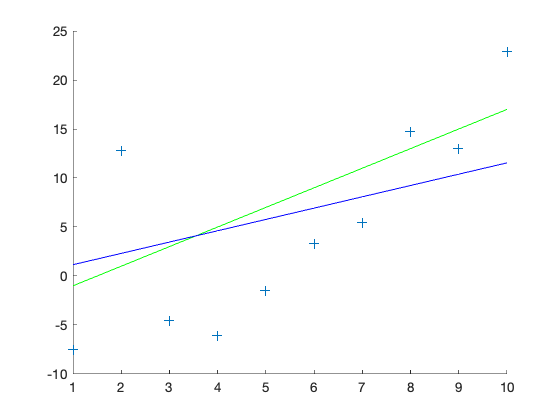

In [648]:
fprintf("L1 a=%.2f b=%.2f loss=%.2f",as(K+1),bs(K+1),rss2(as(K+1),bs(K+1),X,Y));
scatter(X,Y,'+')
hold on
plot(X,a0*X+b0,'color','g')
plot(X,as(K+1)*X+bs(K+1),'color','b')
hold off

As expected, we observe that the loss became larger. Using a high value of $\alpha$, we enforced an inappropriately high penalit. This way, we csould observe increased sparsity, i.e., that the parameter $b$ has an optimal value of (close to) zero.

## 4. Regularization with the $L^2$ Norm constraint

A similar but not identical approach adds a constraing to the square of the $L^2$ Norm of the parameters: $a^2 + b^2$. 

The regulated loss function is 
$$
\begin{aligned}
(\hat a, \hat b) = \arg \min_{a,b} RSS(a,b)&=\sum_{i=1}^{n}(y_i- a x_i - b)^2\\
\text{subject to } a^2 + b^2& \leq c
\end{aligned}
$$  
for some a constant $c$.

The inequality constraint $(a^2 + b^2) \leq c$ is equal to the equality constraint $a^2 + b^2 - c + s^2 = 0$, where $s$ is a new free variable. For the loss function with the equality constraint, we define the generalized Lagrangian:

$$
\begin{aligned}
\mathcal{L}^2(a,b,\alpha,s) &= RSS(a,b) + \alpha(a^2 + b^2 -c +s^2)\\
&= \sum_{i=1}^{n}(y_i- a x_i - b)^2 + \alpha(a^2 + b^2 -c +s^2)
\end{aligned}
$$

The the gradient of is (now unconstraint) problem is:

$$
\begin{aligned}
\nabla \mathcal{L}^2(a,b,\alpha,s) 
&= \left [ \frac{\partial \mathcal{L}^2(a,b,\alpha,s)}{\partial a}, \frac{\partial \mathcal{L}^2(a,b,\alpha,s)}{\partial b}, \frac{\partial \mathcal{L}^2(a,b,\alpha,s)}{\partial \alpha}, \frac{\partial \mathcal{L}^2(a,b,\alpha,s)}{\partial s}\right ]^T\\
&= \left [ 
\frac{\partial RSS(a,b)}{\partial a} + 2\alpha a, 
\frac{\partial RSS(a,b)}{\partial b} + 2\alpha b, 
a^2 + b^2 -c +s^2, 
2\alpha s\right ]^T\\
&= \left [
-2 \sum_{i=1}^{n}(y_i- a x_i-b)x_i + 2 \alpha a, 
-2 \sum_{i=1}^{n}(y_i- a x_i-b) + 2 \alpha b, 
a^2 + b^2 -c +s^2, 
2\alpha s\right ]^T 
\end{aligned}
$$

In [649]:
%%file grad_rss3.m
function grad_w = grad_rss3(a, b, alpha, s, c, X, Y)
    n = length(X);
    grad_a = 0;
    grad_b = 0;
    for i=1:n
        tmp = Y(i) - a*X(i) - b;
        grad_a = grad_a + tmp *X(i);
        grad_b = grad_b + tmp;
    end
    grad_a = -2*grad_a + 2*alpha*a;
    grad_b = -2*grad_b + 2*alpha*b;
    grad_alpha = a^2 + b^2 -c +s^2;
    grad_s = 2*alpha*s;
    grad_w = [grad_a; grad_b; grad_alpha; grad_s];
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV652/Public ML Notebooks/grad_rss3.m'.


In [650]:
%%file grad_desc_rss3.m
function [as, bs, alphas, ss] = grad_desc_rss3(K, a0, b0, alpha0, s0, learning_eps, f, ff, verbose)
    as = zeros(K+1,1);
    bs = zeros(K+1,1);
    alphas = zeros(K+1,1);
    as = zeros(K+1,1);
    as(1)=a0;
    bs(1)=b0;
    alphas(1)=alpha0;
    ss(1)=s0;
    for k = 1:K
        grad_w = ff(as(k),bs(k),alphas(k),ss(k));
        grad_a = grad_w(1);
        grad_b = grad_w(2);
        grad_alpha = grad_w(3);
        grad_s = grad_w(4);
        as(k+1)= as(k) - learning_eps * grad_a;
        bs(k+1)= bs(k) - learning_eps * grad_b;
        alphas(k+1)= alphas(k) - learning_eps * grad_alpha;
        ss(k+1)= ss(k) - learning_eps * grad_s;
        if verbose
            line([as(k),as(k+1)],[bs(k),bs(k+1)])
            hold on
        end
    end
    grad_w = ff(as(k),bs(k),alphas(k),ss(k))
    ffinal = @(a,b)(f(a, b, alphas(K+1), ss(K+1)));
    if verbose
        alow = min([as.', a0-2]);
        ahigh = max([as.', a0+2]);
        blow = min([bs.', b0-3]);
        bhigh = max([bs.', b0+3]);
        [A,B] = meshgrid(alow:0.1:ahigh,blow:0.4:bhigh);
        plot3d(ffinal, A, B, false) %3D contour
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV652/Public ML Notebooks/grad_desc_rss3.m'.



grad_w =

    0.3491
   -2.3087
   -5.4664
    1.9752




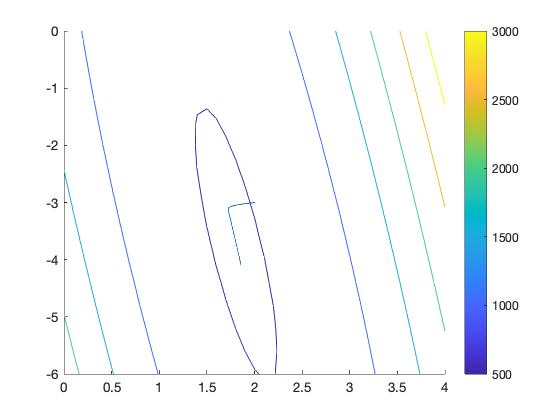

In [651]:
K =500;
learning_eps = 0.0005;
c = (2+1)^2 + (3+1)^2;
fL2c = @(a,b,alpha,s)(f(a,b) + alpha*(a^2 + b^2 -c +s^2));
ffL2c = @(a,b,alpha,s)(grad_rss3(a, b, alpha, s, c, X, Y));
alpha0 = 1;
s0 = 1;
[as, bs, alphas, ss] = grad_desc_rss3(K, a0, b0, alpha0, s0, learning_eps, fL2c, ffL2c, true);

L2 constraint: a=1.84 b=-4.00 alpha=2.51 s=0.39 loss=486.45; a^2 + b^2 = 19.37 < c=25.00


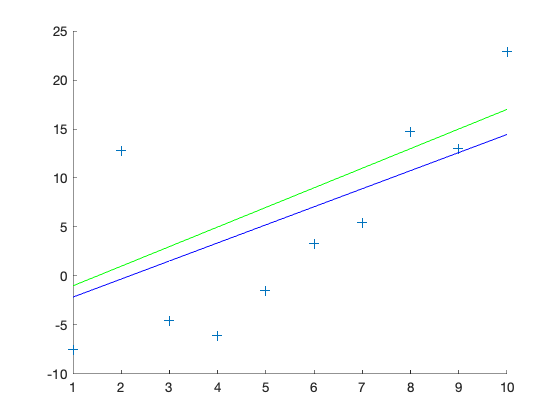

In [652]:
fprintf("L2 constraint: a=%.2f b=%.2f alpha=%.2f s=%.2f loss=%.2f;",as(K+1),bs(K+1),alphas(K+1),ss(K+1),rss2(as(K+1),bs(K+1),X,Y));
fprintf(" a^2 + b^2 = %.2f < c=%.2f",as(K+1)^2+bs(K+1)^2,c);
scatter(X,Y,'+')
hold on
plot(X,a0*X+b0,'color','g')
plot(X,as(K+1)*X+bs(K+1),'color','b')
hold off

Gradient descent does not seem to converge well. Therefore, we solve the constraint optimization problem with the Karush–Kuhn–Tucker (KKT) approach. We need check the KKT conditions:

$$
\begin{aligned}
\frac{\partial \mathcal{L}^2(a,b,\alpha,s)}{\partial a} &=0 \ \ \ \ \ (1)\\
-2 \sum_{i=1}^{n}(y_i- a x_i-b)x_i +2\alpha a&=0\\
\frac{\partial \mathcal{L}^2(a,b,\alpha,s)}{\partial b} &=0 \ \ \ \ \ (2)\\
-2 \sum_{i=1}^{n}(y_i- a x_i-b) +2\alpha b&=0 \\
\alpha (a^2 + b^2 - c) &=0 \ \ \ \ \ (3)
\end{aligned}
$$

We need to distinguish two cases for (3): 
- $\alpha = 0$ and $a^2 + b^2 - c < 0$, i.e., the constraint is inactive, (3a) 
- $\alpha > 0$ and $a^2 + b^2 - c = 0$, i.e., the constraint is active, (3b) 

Case (3a) reduces to the unconstraint problem, which we have solved already. The solution was $a\approx 2.49$ and $b\approx -8.44$. Checking the constraint on this solutions let's us conclude it is not $<0$ and, hence, the solution is not  feasible:

In [653]:
c = (2+1)^2 + (3+1)^2
(a_orig)^2+(b_orig)^2-c 


c =

    25


ans =

   52.4154




Case (3b) leads to the following system of equations that we can solve:

In [654]:
eins= ones(N,1);
syms a b alpha;
eqn1 = -2 * ((Y-a*X-b)*X.') + 2* alpha*a==0;
eqn2 = -2 * ((Y-a*X-b)*eins) + 2* alpha*b==0;
eqn3 = a^2 + b^2 == c;

In [655]:
sol = vpasolve([eqn1, eqn2, eqn3], [a, b, alpha]);
a_hats= sol.a;
b_hats=sol.b;
alpha_hats = sol.alpha;

There are several local optima fulfilling the constraints. Some are maybe local minima, some local maxima. We would need to check the second order constraints involving the Herssian (deliberately omitted here). We just pick the one minimizing the unregulated loss function $RSS$.

L2 constraint: a=0.58 b=4.97 alpha=-5.88 loss=829.18 feasible: a^2 + b^2 = 25.00 == c=25.00
L2 constraint: a=4.94 b=0.77 alpha=-293.51 loss=6086.41 feasible: a^2 + b^2 = 25.00 == c=25.00
L2 constraint: a=-4.95 b=-0.67 alpha=-492.28 loss=16023.86 feasible: a^2 + b^2 = 25.00 == c=25.00
L2 constraint: a=1.93 b=-4.61 alpha=1.68 loss=475.53 feasible: a^2 + b^2 = 25.00 == c=25.00



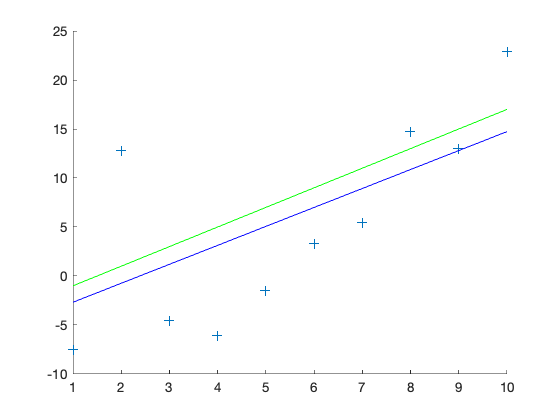

In [656]:
min_rss = realmax;
arg_min = 0;
for i =1:length(a_hats)
    a_hat = a_hats(i);
    b_hat = b_hats(i);
    alpha_hat = alpha_hats(i);
    rss = rss2(a_hat,b_hat,X,Y);
    if min_rss > rss
        arg_min = i;
        min_rss = rss;
    end
    fprintf("L2 constraint: a=%.2f b=%.2f alpha=%.2f loss=%.2f",a_hat,b_hat,alpha_hat,rss);
    fprintf(" feasible: a^2 + b^2 = %.2f == c=%.2f\n",(a_hat)^2+(b_hat)^2,c);
end
scatter(X,Y,'+')
hold on
plot(X,a0*X+b0,'color','g')
plot(X,a_hats(arg_min)*X+b_hats(arg_min),'color','b')
hold off

## Regularization with the $L^1$ Norm constraint

Finally we can set a constraint to the $L^1$ Norm of the parameters: $|a| + |b|$. 

The regulated loss function is 
$$
\begin{aligned}
(\hat a, \hat b) = \arg \min_{a,b} RSS(a,b)&=\sum_{i=1}^{n}(y_i- a x_i - b)^2\\
\text{subject to } |a| + |b|& \leq c
\end{aligned}
$$  
for some parameter $\alpha$ and a constant $c$.

The inequality constraint $|a| + |b| \leq c$ is equal to the equality constraint $|a| + |b| - c + s^2 = 0$. For the loss function with the equality constraint, we define the generalized Lagrangian:

$$
\begin{aligned}
\mathcal{L}^1(a,b,\alpha,s) &= RSS(a,b) + \alpha(|a| + |b| -c +s^2)\\
&= \sum_{i=1}^{n}(y_i- a x_i - b)^2 + \alpha(|a| + |b| -c +s^2)
\end{aligned}
$$

The the gradient of is (now unconstraint) problem is:

$$
\begin{aligned}
\nabla \mathcal{L}^1(a,b,\alpha,s) 
&= \left [ \frac{\partial \mathcal{L}^1(a,b,\alpha,s)}{\partial a}, \frac{\partial \mathcal{L}^1(a,b,\alpha,s)}{\partial b}, \frac{\partial \mathcal{L}^1(a,b,\alpha,s)}{\partial \alpha}, \frac{\partial \mathcal{L}^1(a,b,\alpha,s)}{\partial s}\right ]^T\\
&= \left [ \frac{\partial RSS(a,b)}{\partial a} +\alpha\ \text{sign}(a), \frac{\partial RSS(a,b)}{\partial b}+\alpha\ \text{sign}(b), |a| + |b| -c +s^2, 2\alpha s\right ]^T\\
&= \left [-2 \sum_{i=1}^{n}(y_i- a x_i-b)x_i +\alpha\ \text{sign}(a), -2 \sum_{i=1}^{n}(y_i- a x_i-b) +\alpha\ \text{sign}(b), |a| + |b| -c +s^2, 2\alpha s\right ]^T 
\end{aligned}
$$

In [657]:
%%file grad_rss4.m
function grad_w = grad_rss4(a, b, alpha, s, c, X, Y)
    n = length(X);
    grad_a = 0;
    grad_b = 0;
    for i=1:n
        tmp = Y(i) - a*X(i) - b;
        grad_a = grad_a + tmp *X(i);
        grad_b = grad_b + tmp;
    end
    grad_a = -2*grad_a + alpha*sign(a);
    grad_b = -2*grad_b + alpha*sign(b);
    grad_alpha = abs(a) + abs(b) -c +s^2;
    grad_s = 2*alpha*s;
    grad_w = [grad_a; grad_b; grad_alpha; grad_s];
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV652/Public ML Notebooks/grad_rss4.m'.



grad_w =

   -1.1082
    7.7007
    1.9451
    1.0344




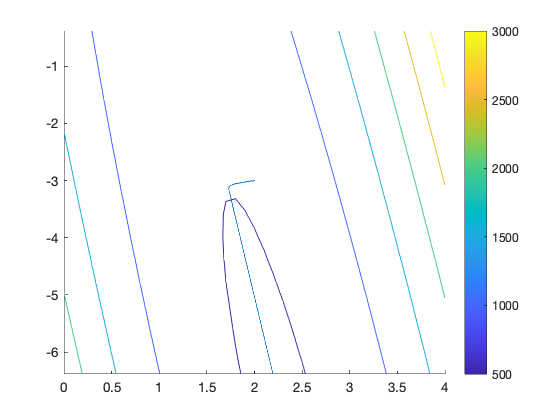

In [658]:
K = 500;
learning_eps = 0.0005;
c = (2+1) + (3+1);
fL1c = @(a,b,alpha,s)(f(a,b) + alpha*(abs(a) + abs(b) -c +s^2));
ffL1c = @(a,b,alpha,s)(grad_rss4(a, b, alpha, s, c, X, Y));
[as, bs, alphas, ss] = grad_desc_rss3(K, a0, b0, alpha0, s0, learning_eps, fL1c, ffL1c, true);

L1 constraint: a=2.19 b=-6.38 alpha=0.85 s=0.61 loss=453.16 |a| + |b| = 8.58 < c=7.00


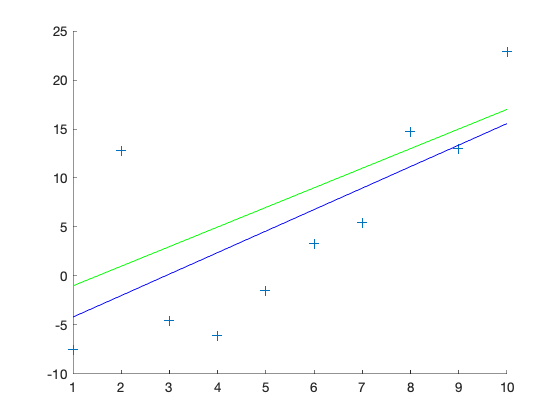

In [659]:
fprintf("L1 constraint: a=%.2f b=%.2f alpha=%.2f s=%.2f loss=%.2f",as(K+1),bs(K+1),alphas(K+1),ss(K+1),rss2(as(K+1),bs(K+1),X,Y));
fprintf(" |a| + |b| = %.2f < c=%.2f",abs(as(K+1))+abs(bs(K+1)),c);
scatter(X,Y,'+')
hold on
plot(X,a0*X+b0,'color','g')
plot(X,as(K+1)*X+bs(K+1),'color','b')
hold off

Gradient descent does not seem to converge well. Even the constraint is violated. Therefore, we solve the constraint optimization problem with the Karush–Kuhn–Tucker (KKT) approach. Therefore, we check the KKT conditions:

$$
\begin{aligned}
\frac{\partial \mathcal{L}^1(a,b,\alpha,s)}{\partial a} &=0 \ \ \ \ \ (1)\\
-2 \sum_{i=1}^{n}(y_i- a x_i-b)x_i +\alpha\ \text{sign}(a) &=0\\
\frac{\partial \mathcal{L}^1(a,b,\alpha,s)}{\partial b} &=0 \ \ \ \ \ (2)\\
-2 \sum_{i=1}^{n}(y_i- a x_i-b) +\alpha\ \text{sign}(b) &=0 \\
\alpha (|a| + |b| - c) &=0 \ \ \ \ \ (3)
\end{aligned}
$$

We need to distinguish two cases for (3): 
- $\alpha = 0$ and $|a| + |b| - c < 0$, i.e., the constraint is inactive, (3a) 
- $\alpha > 0$ and $|a| + |b| - c = 0$, i.e., the constraint is active, (3b) 

Case (3a) reduces to the unconstraint problem, which we have solved: $a\approx 2.49$ and $b\approx -8.44$. Checking the constraint on this solutions let's us conclude it is not $<0$ and, hence, the solution is not  feasible:

In [660]:
c = (2+1) + (3+1);
abs(a_orig)+abs(b_orig)-c 


ans =

    3.9288




Case (3b) leads to the following system of equations:

In [661]:
eins= ones(N,1);
syms a b alpha;
eqn1 = -2 * ((Y-a*X-b)*X.') + alpha*sign(a)==0;
eqn2 = -2 * ((Y-a*X-b)*eins) + alpha*sign(b)==0;
eqn3 = abs(a) + abs(b) == c;

In [662]:
sol = vpasolve([eqn1, eqn2, eqn3], [a, b, alpha]);
a_hat= sol.a;
b_hat=sol.b;
alpha_hat = sol.alpha;

L1 constraint: a=0.45 b=6.55 alpha=-74.97 loss=929.50 |a| + |b| = 7.00 == c=7.00


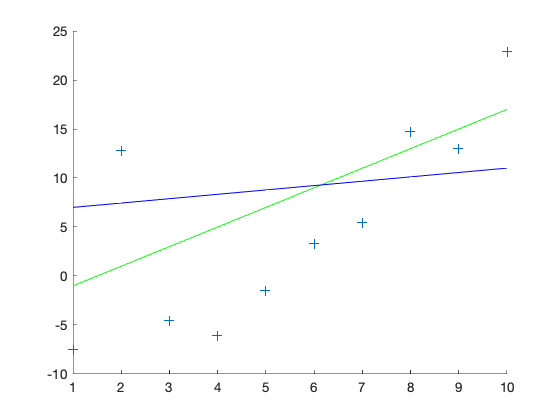

In [663]:
fprintf("L1 constraint: a=%.2f b=%.2f alpha=%.2f loss=%.2f",a_hat,b_hat,alpha_hat,rss2(a_hat,b_hat,X,Y));
fprintf(" |a| + |b| = %.2f == c=%.2f",abs(a_hat)+abs(b_hat),c);
scatter(X,Y,'+')
hold on
plot(X,a0*X+b0,'color','g')
plot(X,a_hat*X+b_hat,'color','b')
hold off

## Regularization of underconstraint problems

Let's look at a problem with two predictors and generate some test data. We set $a_1=a_2=2$ and $b=-3$ and generate $100$ datapoints $Y=a_1X_1+a_2X_2 + b$ where $X_1, X_2\in [1,10]$ with a random error that is normally distributed proportional to $\mathcal{N}(0,10)$. 

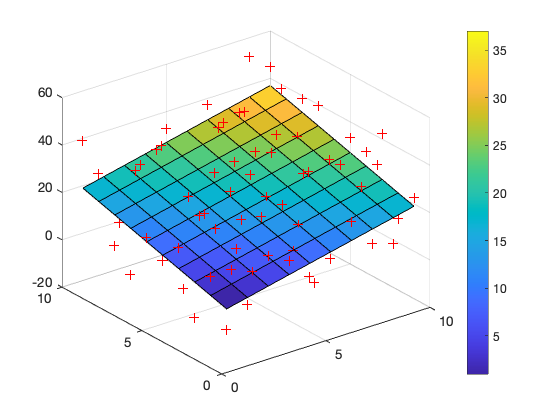

In [664]:
XX=fliplr(fullfact([N N]));
a10 = 2;
a20 = 2;
b0 = -3;
X1 = XX(:,1);
X2 = XX(:,2);

f0 = @(x1,x2)(a10*x1 + a20*x2 + b0);
f = @(x1,x2,r)(a10*x1 + a20*x2 + b0 + r);
R = normrnd(0,10,1,N*N).';
Y = arrayfun(f,X1,X2,R);
[A,B] = meshgrid(1:N,1:N);
plot3d(f0,A,B, true);
hold on
scatter3(X1,X2,Y,'r+')

Let's check the error $RSS_0$ for the initial parameters, learn new parameters from the generated data with linear regression minimizing $RSS$, and then check again this new error.

In [665]:
XS = [ones(N*N,1), XX];
w0 = [b0, a10, a20].';
RSS0 = (Y - XS* w0).' * (Y - XS* w0)
w = inv(XS.'*XS)*XS.'*Y
RSS = (Y - XS* w).' * (Y - XS* w)


RSS0 =

   1.0344e+04


w =

   -4.8482
    2.1845
    2.1556


RSS =

   1.0296e+04




We make it an underspecified problem by just keeping data points with $X_1=1$, i.e., we don't see any variability in this dimension. This makes $X^TX$ a singular matrix and, hence, not invertible. Analytically, we cannot find a solution any longer.

In [666]:
uXX = XX(1:10,:);
uY = Y(1:10);
uXS = [ones(N,1), uXX];
RSS0 = (uY - uXS* w0).' * (uY - uXS* w0)
w = inv(uXS.' * uXS) * uXS.' * uY;


RSS0 =

   1.5473e+03





With the suggested regularization, $X^TX \rightarrow X^TX +\alpha I$ gets invertible and we find an approximate solution analytically.

In [667]:
alpha = 0.1;
I = eye(3);
w = inv(uXS.' * uXS + alpha *I) * uXS.' * uY
RSS = (uY - uXS* w).' * (uY - uXS* w)


w =

   -4.3887
   -4.3887
    3.2780


RSS =

   1.3993e+03


